In [187]:
# Importing all necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [188]:
# Loading files
train_features=pd.read_csv("Trainingfeatures.csv")
train_labels=pd.read_csv("TrainingLabels.csv")
test=pd.read_csv("Testingfeatures.csv")

In [189]:
train_features.head()

,id,amount_tsh,date_recorded,funder,gps_height,installer,longitude,latitude,wpt_name,num_private,basin,subvillage,region,region_code,district_code,lga,ward,population,public_meeting,recorded_by,scheme_management,scheme_name,permit,construction_year,extraction_type,extraction_type_group,extraction_type_class,management,management_group,payment,payment_type,water_quality,quality_group,quantity,quantity_group,source,source_type,source_class,waterpoint_type,waterpoint_type_group
0,69572,6000.0,2011-03-14,Roman,1390,Roman,34.938093,-9.856322,none,0,Lake Nyasa,Mnyusi B,Iringa,11,5,Ludewa,Mundindi,109,True,GeoData Consultants Ltd,VWC,Roman,False,1999,gravity,gravity,gravity,vwc,user-group,pay annually,annually,soft,good,enough,enough,spring,spring,groundwater,communal standpipe,communal standpipe
1,8776,0.0,2013-03-06,Grumeti,1399,GRUMETI,34.698766,-2.147466,Zahanati,0,Lake Victoria,Nyamara,Mara,20,2,Serengeti,Natta,280,NaN,GeoData Consultants Ltd,Other,NaN,True,2010,gravity,gravity,gravity,wug,user-group,never pay,never pay,soft,good,insufficient,insufficient,rainwater harvesting,rainwater harvesting,surface,communal standpipe,communal standpipe
2,34310,25.0,2013-02-25,Lottery Club,686,World vision,37.460664,-3.821329,Kwa Mahundi,0,Pangani,Majengo,Manyara,21,4,Simanjiro,Ngorika,250,True,GeoData Consultants Ltd,VWC,Nyumba ya mungu pipe scheme,True,2009,gravity,gravity,gravity,vwc,user-group,pay per bucket,per bucket,soft,good,enough,enough,dam,dam,surface,communal standpipe multiple,communal standpipe
3,67743,0.0,2013-01-28,Unicef,263,UNICEF,38.486161,-11.155298,Zahanati Ya Nanyumbu,0,Ruvuma / Southern Coast,Mahakamani,Mtwara,90,63,Nanyumbu,Nanyumbu,58,True,GeoData Consultants Ltd,VWC,NaN,True,1986,submersible,submersible,submersible,vwc,user-group,never pay,never pay,soft,good,dry,dry,machine dbh,borehole,groundwater,communal standpipe multiple,communal standpipe
4,19728,0.0,2011-07-13,Action In A,0,Artisan,31.130847,-1.825359,Shuleni,0,Lake Victoria,Kyanyamisa,Kagera,18,1,Karagwe,Nyakasimbi,0,True,GeoData Consultants Ltd,NaN,NaN,True,0,gravity,gravity,gravity,other,other,never pay,never pay,soft,good,seasonal,seasonal,rainwater harvesting,rainwater harvesting,surface,communal standpipe,communal standpipe


In [190]:
train_labels.head()

,id,status_group
0,69572,functional
1,8776,functional
2,34310,functional
3,67743,non functional
4,19728,functional


In [191]:
train=pd.merge(train_features,train_labels,on='id')
train_test=pd.concat([train,test])


In [192]:
train_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 74250 entries, 0 to 14849
Data columns (total 41 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   id                     74250 non-null  int64  
 1   amount_tsh             74250 non-null  float64
 2   date_recorded          74250 non-null  object 
 3   funder                 69746 non-null  object 
 4   gps_height             74250 non-null  int64  
 5   installer              69718 non-null  object 
 6   longitude              74250 non-null  float64
 7   latitude               74250 non-null  float64
 8   wpt_name               74250 non-null  object 
 9   num_private            74250 non-null  int64  
 10  basin                  74250 non-null  object 
 11  subvillage             73780 non-null  object 
 12  region                 74250 non-null  object 
 13  region_code            74250 non-null  int64  
 14  district_code          74250 non-null  int64  
 15  lg

In [193]:
train_test.describe()

,id,amount_tsh,gps_height,longitude,latitude,num_private,region_code,district_code,population,construction_year
count,74250.000000,74250.000000,74250.000000,74250.000000,7.425000e+04,74250.000000,74250.000000,74250.000000,74250.000000,74250.000000
mean,37124.500000,318.685704,665.667313,34.074262,-5.701771e+00,0.462330,15.265414,5.629077,180.750828,1298.463650
std,21434.273081,2906.762364,692.761033,6.572519,2.944969e+00,11.537879,17.508907,9.641636,471.086120,952.349375
min,0.000000,0.000000,-90.000000,0.000000,-1.164944e+01,0.000000,1.000000,0.000000,0.000000,0.000000
25%,18562.250000,0.000000,0.000000,33.086819,-8.525675e+00,0.000000,5.000000,2.000000,0.000000,0.000000
50%,37124.500000,0.000000,364.000000,34.907475,-5.026540e+00,0.000000,12.000000,3.000000,25.000000,1986.000000
75%,55686.750000,20.000000,1317.000000,37.181685,-3.325058e+00,0.000000,17.000000,5.000000,215.000000,2004.000000
max,74249.000000,350000.000000,2777.000000,40.345193,-2.000000e-08,1776.000000,99.000000,80.000000,30500.000000,2013.000000


***Strategy for EDA :-***
1.   Explore our status_group column.
2.   We have a lot of categorical features so first we will explore them.
3.   There are few Numerical features which we will explore.



In [194]:
#List containing columns to drop
drop_cols=[]

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



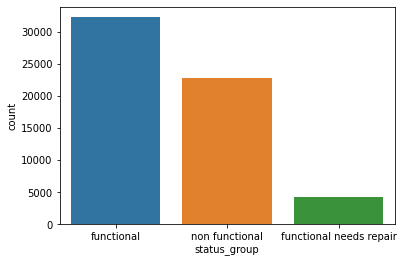

In [195]:
sns.countplot(train_test['status_group'])

**We can see that there is class imbalance here.**

**Funder and Installer Columns**

In [196]:
print("Value Counts of Funder Column")
print(train_test['funder'].value_counts())
print(" ")
print("Value Counts of Installer Column")
print(train_test['installer'].value_counts())

Value Counts of Funder Column
Government Of Tanzania            11299
Danida                             3907
Hesawa                             2782
Rwssp                              1703
World Bank                         1701
                                  ...  
African Reflections Foundation        1
Dar Es Salaam Round Table             1
Saidi Halfani                         1
Kanisa La Mitume                      1
Holili Water Supply                   1
Name: funder, Length: 2140, dtype: int64
 
Value Counts of Installer Column
DWE           21751
Government     2282
RWE            1498
Commu          1347
DANIDA         1305
              ...  
Okong'o           1
Arrian            1
LUNGWE            1
Msig              1
Muhindi           1
Name: installer, Length: 2410, dtype: int64


In [197]:
# No of rows where both funder and installer have NAN values.
print("No of NAN Values in Funder Column =",train_test['funder'].isnull().sum())
print(" ")
print("No of NAN Values in Installer Column =",train_test['installer'].isnull().sum())
print(" ")
a=len(train_test.loc[(train_test['funder'].isnull()) & (train_test['installer'].isnull())])
print("No of rows where both Funder and Installer have NAN Values =",a)


No of NAN Values in Funder Column = 4504
 
No of NAN Values in Installer Column = 4532
 
No of rows where both Funder and Installer have NAN Values = 4439


 From above we can see that rows where both funder both installer have NAN values are very high. So we can impute both this columns with same value. 

***Num Private***

In [198]:
print(" Values Counts  of  num private :-")
print(train_test['num_private'].value_counts())

 Values Counts  of  num private :-
0      73299
1         94
6         92
5         60
8         58
       ...  
30         1
669        1
668        1
213        1
62         1
Name: num_private, Length: 68, dtype: int64


**As no description is given for this dataset on driven data and since most values are zero we will drop it.**

In [199]:
drop_cols.append("num_private")

***Basin and Wpt_name***

In [200]:
print(" Value Counts of Basin")
print(train_test['basin'].value_counts())

 Value Counts of Basin
Lake Victoria              12871
Pangani                    11143
Rufiji                      9987
Internal                    9642
Lake Tanganyika             8052
Wami / Ruvu                 7577
Lake Nyasa                  6332
Ruvuma / Southern Coast     5587
Lake Rukwa                  3059
Name: basin, dtype: int64


In [201]:
pd.crosstab(train_test['status_group'],train_test['basin'])

basin,Internal,Lake Nyasa,Lake Rukwa,Lake Tanganyika,Lake Victoria,Pangani,Rufiji,Ruvuma / Southern Coast,Wami / Ruvu
status_group,,,,,,,,,
functional,4482,3324,1000,3107,5100,5372,5068,1670,3136
functional needs repair,557,250,270,742,989,477,437,326,269
non functional,2746,1511,1184,2583,4159,3091,2471,2497,2582


**We can see their is some correlation between basin and status_group**

In [202]:
print("Value Counts of wpt_name")
print(train_test['wpt_name'].value_counts())

Value Counts of wpt_name
none                   4440
Shuleni                2183
Zahanati               1034
Msikitini               647
Kanisani                390
                       ... 
Kandege                   1
Kwa Yosia                 1
Kwa Karimu Ngonyani       1
Mwita Nyakarare           1
Kwa Maturike              1
Name: wpt_name, Length: 45684, dtype: int64


In [203]:
pd.crosstab(train_test['wpt_name'],train_test['status_group'])

status_group,functional,functional needs repair,non functional
wpt_name,,,
24,0,0,1
A Kulwa,0,0,1
A Saidi,1,0,0
Abass,1,0,0
Abbas,1,0,0
...,...,...,...
Zungu,1,0,0
Zunguni,0,0,1
Zunzuli A Shuleni,0,0,1


In [204]:
drop_cols.append("wpt_name")

**From above we can see there is no correlation between wpt_name and status_group and also wpt_name has lot of values. Also it logically makes sense since the name of water-point will not have any impact on whether that water-point is functional or needs repair or non functional**

**Geographical Locations Columns**

In [205]:
print(" Value Counts of Region and Region code")
print(" ")
print(train_test['region'].value_counts())
print(" ")
print(train_test['region_code'].value_counts())

 Value Counts of Region and Region code
 
Iringa           6599
Shinyanga        6293
Mbeya            5758
Kilimanjaro      5494
Morogoro         5038
Kagera           4174
Arusha           4111
Mwanza           3897
Kigoma           3533
Pwani            3331
Ruvuma           3306
Tanga            3186
Dodoma           2779
Singida          2536
Tabora           2466
Mara             2451
Rukwa            2242
Mtwara           2144
Manyara          1972
Lindi            1920
Dar es Salaam    1020
Name: region, dtype: int64
 
11    6608
17    6334
12    5759
3     5494
5     5079
18    4183
19    3824
2     3709
16    3533
10    3306
4     3145
1     2779
13    2536
14    2488
20    2451
15    2242
6     2032
21    1972
80    1536
60    1298
90    1133
7     1020
99     512
9      499
24     402
8      375
40       1
Name: region_code, dtype: int64


In [206]:
unique_regions=list(np.unique(train_test['region']))
for region in unique_regions:
  print(region)
  print(train_test[train_test['region']==region]['region_code'].value_counts())
  print(" ")


Arusha
2     3709
24     402
Name: region_code, dtype: int64
 
Dar es Salaam
7    1020
Name: region_code, dtype: int64
 
Dodoma
1    2779
Name: region_code, dtype: int64
 
Iringa
11    6599
Name: region_code, dtype: int64
 
Kagera
18    4174
Name: region_code, dtype: int64
 
Kigoma
16    3533
Name: region_code, dtype: int64
 
Kilimanjaro
3    5494
Name: region_code, dtype: int64
 
Lindi
80    1536
8      375
18       9
Name: region_code, dtype: int64
 
Manyara
21    1972
Name: region_code, dtype: int64
 
Mara
20    2451
Name: region_code, dtype: int64
 
Mbeya
12    5758
Name: region_code, dtype: int64
 
Morogoro
5    5038
Name: region_code, dtype: int64
 
Mtwara
90    1133
99     512
9      499
Name: region_code, dtype: int64
 
Mwanza
19    3824
17      72
12       1
Name: region_code, dtype: int64
 
Pwani
6     2032
60    1298
40       1
Name: region_code, dtype: int64
 
Rukwa
15    2242
Name: region_code, dtype: int64
 
Ruvuma
10    3306
Name: region_code, dtype: int64
 
Shinyanga
17

**From above we can see region and region_codes are highly correlated so we need to drop one of them. Also  for many regions have directly unique region_code and for some there are more then 1 region codes so we can drop region and keep region_codes because there are some region which have more then 1 region_code and if we drop region_code these knowledge will vanish so we will drop region.**

In [207]:
drop_cols.append("region")

In [208]:
print("Unique Values of SubVillage and district codes")
print(" ")
print(train_test['subvillage'].value_counts())
print(train_test['district_code'].value_counts())

Unique Values of SubVillage and district codes
 
Shuleni      646
Majengo      631
Madukani     629
Kati         467
Mtakuja      322
            ... 
Ibogoma        1
Cikolola       1
Ruyogoro       1
Mwakasema      1
Komtongo       1
Name: subvillage, Length: 21425, dtype: int64
1     15299
2     13929
3     12521
4     11253
5      5428
6      5108
7      4166
8      1282
30     1256
33     1063
53      921
43      653
13      496
23      360
63      264
62      127
60       76
0        27
80       13
67        8
Name: district_code, dtype: int64


In [209]:
pd.crosstab(train_test['subvillage'],train_test['status_group'])

status_group,functional,functional needs repair,non functional
subvillage,,,
##,1,0,0
'A' Kati,0,0,1
1,52,8,72
14Kambalage,5,0,0
18,0,0,1
...,...,...,...
Zumbawanu Shuleni,1,0,0
Zunga,1,0,0
Zunguni,0,0,1


 There are alot of values for subvillage so we can either drop it or keep it we have to check both the options and see which works best.As of now we will not add it to drop_cols.

In [210]:
print("Unique Values of lga and ward")
print(" ")
print(train_test['lga'].value_counts())
print(train_test['ward'].value_counts())

Unique Values of lga and ward
 
Njombe          3128
Moshi Rural     1566
Arusha Rural    1521
Bariadi         1485
Rungwe          1381
                ... 
Songea Urban     103
Kigoma Urban      95
Arusha Urban      82
Lindi Urban       24
Nyamagana          2
Name: lga, Length: 125, dtype: int64
Igosi        386
Imalinyi     318
Siha Kati    297
Mdandu       292
Nduruma      261
            ... 
Kirongo        1
Mdabulo        1
Korongoni      1
Mawenzi        1
Gorong'a       1
Name: ward, Length: 2098, dtype: int64


**Same as of subvillage we have to try both.**

**Recordedby,Schemename and SchemeManagement**

In [211]:
# Since all values are recorded by GeoData Consultants Ltd we can drop it and also scheme_name has alot of null values 
# can drop it.
drop_cols.append("recorded_by")
drop_cols.append("scheme_name")


In [212]:
print(train_test['scheme_management'].value_counts())

VWC                 45917
WUG                  6496
Water authority      3975
WUA                  3551
Water Board          3462
Parastatal           2124
Company              1341
Private operator     1326
Other                 996
SWC                   123
Trust                  92
None                    1
Name: scheme_management, dtype: int64


We can impute scheme_management with either mode or value="missing" as done for Funder and Installer in modelling we can try both and check which works better.

In [213]:
train_test['management_group'].value_counts()

user-group    65538
commercial     4591
parastatal     2229
other          1209
unknown         683
Name: management_group, dtype: int64

In [214]:
train_test['management'].value_counts()

vwc                 50624
wug                  8108
water board          3688
wua                  3118
private operator     2504
parastatal           2229
water authority      1123
other                1083
company               859
unknown               683
other - school        126
trust                 105
Name: management, dtype: int64

In [215]:
print(train_test[train_test['management_group']=='user-group']['management'].value_counts())
print(train_test[train_test['management_group']=='commercial']['management'].value_counts())

vwc            50624
wug             8108
water board     3688
wua             3118
Name: management, dtype: int64
private operator    2504
water authority     1123
company              859
trust                105
Name: management, dtype: int64


In [216]:
pd.crosstab(train_test['management'],train_test['status_group'])

status_group,functional,functional needs repair,non functional
management,,,
company,267,15,403
other,505,55,284
other - school,23,1,75
parastatal,1020,211,537
private operator,1476,44,451
trust,46,6,26
unknown,224,27,310
vwc,20425,2791,17291
water authority,446,52,406


In [217]:
pd.crosstab(train_test['management_group'],train_test['status_group'])

status_group,functional,functional needs repair,non functional
management_group,,,
commercial,2235,117,1286
other,528,56,359
parastatal,1020,211,537
unknown,224,27,310
user-group,28252,3906,20332


Management_group are Management are correlated but we can see that both are correlated with status_group

**Extraction Columns**

In [218]:
pd.crosstab(train_test['extraction_type'],train_test['extraction_type_class'])

extraction_type_class,gravity,handpump,motorpump,other,rope pump,submersible,wind-powered
extraction_type,,,,,,,
afridev,0,2208,0,0,0,0,0
cemo,0,0,108,0,0,0,0
climax,0,0,41,0,0,0,0
gravity,33263,0,0,0,0,0,0
india mark ii,0,3029,0,0,0,0,0
india mark iii,0,135,0,0,0,0,0
ksb,0,0,0,0,0,1790,0
mono,0,0,3628,0,0,0,0
nira/tanira,0,10205,0,0,0,0,0


In [219]:
pd.crosstab(train_test['extraction_type_group'],train_test['extraction_type_class'])


extraction_type_class,gravity,handpump,motorpump,other,rope pump,submersible,wind-powered
extraction_type_group,,,,,,,
afridev,0,2208,0,0,0,0,0
gravity,33263,0,0,0,0,0,0
india mark ii,0,3029,0,0,0,0,0
india mark iii,0,135,0,0,0,0,0
mono,0,0,3628,0,0,0,0
nira/tanira,0,10205,0,0,0,0,0
other,0,0,0,8102,0,0,0
other handpump,0,447,0,0,0,0,0
other motorpump,0,0,149,0,0,0,0


In [220]:
pd.crosstab(train_test['extraction_type'],train_test['extraction_type_group'])

extraction_type_group,afridev,gravity,india mark ii,india mark iii,mono,nira/tanira,other,other handpump,other motorpump,rope pump,submersible,swn 80,wind-powered
extraction_type,,,,,,,,,,,,,
afridev,2208,0,0,0,0,0,0,0,0,0,0,0,0
cemo,0,0,0,0,0,0,0,0,108,0,0,0,0
climax,0,0,0,0,0,0,0,0,41,0,0,0,0
gravity,0,33263,0,0,0,0,0,0,0,0,0,0,0
india mark ii,0,0,3029,0,0,0,0,0,0,0,0,0,0
india mark iii,0,0,0,135,0,0,0,0,0,0,0,0,0
ksb,0,0,0,0,0,0,0,0,0,0,1790,0,0
mono,0,0,0,0,3628,0,0,0,0,0,0,0,0
nira/tanira,0,0,0,0,0,10205,0,0,0,0,0,0,0


In [221]:
drop_cols.append("extraction_type_group")

**Payment Columns**

In [222]:
print(train_test['payment'].value_counts())
print(train_test['payment_type'].value_counts())

never pay                31712
pay per bucket           11266
pay monthly              10397
unknown                  10149
pay when scheme fails     4842
pay annually              4570
other                     1314
Name: payment, dtype: int64
never pay     31712
per bucket    11266
monthly       10397
unknown       10149
on failure     4842
annually       4570
other          1314
Name: payment_type, dtype: int64


**We can drop payment since both payment_type and payment are same.**

***Water Quality and Quantity  Columns***

In [223]:
print(train_test['water_quality'].value_counts())
print(train_test['quality_group'].value_counts())

soft                  63505
salty                  6082
unknown                2345
milky                  1005
coloured                623
salty abandoned         423
fluoride                244
fluoride abandoned       23
Name: water_quality, dtype: int64
good        63505
salty        6505
unknown      2345
milky        1005
colored       623
fluoride      267
Name: quality_group, dtype: int64


In [224]:
# Since there is no point in splitting fluorides into fluoride,fluoride_abandoned
drop_cols.append("water_quality")

In [225]:
print(train_test['quantity'].value_counts())
print(train_test['quantity_group'].value_counts())

enough          41522
insufficient    18896
dry              7782
seasonal         5075
unknown           975
Name: quantity, dtype: int64
enough          41522
insufficient    18896
dry              7782
seasonal         5075
unknown           975
Name: quantity_group, dtype: int64


In [226]:
# we can drop quantity_group
drop_cols.append("quantity_group")

***Source Columns***

In [227]:
print(train_test['source'].value_counts())
print(train_test['source_class'].value_counts())
print(train_test['source_type'].value_counts())

spring                  21216
shallow well            21140
machine dbh             13822
river                   11964
rainwater harvesting     2863
hand dtw                 1108
lake                      950
dam                       840
other                     261
unknown                    86
Name: source, dtype: int64
groundwater    57286
surface        16617
unknown          347
Name: source_class, dtype: int64
spring                  21216
shallow well            21140
borehole                14930
river/lake              12914
rainwater harvesting     2863
dam                       840
other                     347
Name: source_type, dtype: int64


In [228]:
# As source and source_type have similar columns we can drop one of them but as source has more  values we can drop source_type
drop_cols.append("source_type")

***WaterPoint Columns***

In [229]:
print(train_test['waterpoint_type'].value_counts())
print(train_test['waterpoint_type_group'].value_counts())

communal standpipe             35628
hand pump                      21884
other                           8010
communal standpipe multiple     7611
improved spring                  959
cattle trough                    150
dam                                8
Name: waterpoint_type, dtype: int64
communal standpipe    43239
hand pump             21884
other                  8010
improved spring         959
cattle trough           150
dam                       8
Name: waterpoint_type_group, dtype: int64


In [230]:
# both are same  so we are dropping 
drop_cols.append("waterpoint_type_group")

**Numerical Columns**

In [231]:
print(drop_cols)

['num_private', 'wpt_name', 'region', 'recorded_by', 'scheme_name', 'extraction_type_group', 'water_quality', 'quantity_group', 'source_type', 'waterpoint_type_group']


In [232]:
train_test['amount_tsh'].describe()

count     74250.000000
mean        318.685704
std        2906.762364
min           0.000000
25%           0.000000
50%           0.000000
75%          20.000000
max      350000.000000
Name: amount_tsh, dtype: float64

In [246]:
# amount_tsh is total static head(total water available to the water point)
# If ammount_tsh is zeros that water_point should be non-functional
print(train_test[train_test['amount_tsh']==0]['status_group'].value_counts())
print("%d%s Values of amount_tsh are zero"%(len(train_test[train_test['amount_tsh']==0])/len(train_test)*100,'%'))

functional                 19706
non functional             18885
functional needs repair     3048
Name: status_group, dtype: int64
70% Values of amount_tsh are zero


Since there are functional as well as non-functional and needs repair this zero values are wrong so we can either 
drop amount_tsh since over 70% of values or replace those with median

In [247]:
print(train_test['construction_year'].describe())

count    74250.000000
mean      1298.463650
std        952.349375
min          0.000000
25%          0.000000
50%       1986.000000
75%       2004.000000
max       2013.000000
Name: construction_year, dtype: float64


Same as of amount_tsh construction_year=0 is a wrong value so we can replace it with median

In [248]:
print(train_test['latitude'].describe())
print(train_test['longitude'].describe())

count    7.425000e+04
mean    -5.701771e+00
std      2.944969e+00
min     -1.164944e+01
25%     -8.525675e+00
50%     -5.026540e+00
75%     -3.325058e+00
max     -2.000000e-08
Name: latitude, dtype: float64
count    74250.000000
mean        34.074262
std          6.572519
min          0.000000
25%         33.086819
50%         34.907475
75%         37.181685
max         40.345193
Name: longitude, dtype: float64


For tanzania we can see on map that longitude is not zero for any region so we can replace it with median.

In [252]:
print(len(train_test[train_test['longitude']==0]))

2269


We can drop the  columns  in list drop_cols and preprocess the numerical features before the model pipeline.